# CS224W - Colab1 Extension 

In this notebook, we will implement a pipeline for **learning node embeddings** from scratch, and all the steps are as follows:

1. Load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club), which we've seen in Colab0. And, we will explore multiple graph statistics for that graph.
2. Transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.
3. Finish the first learning algorithm on graphs, a **node embedding** model, which's simpler than `DeepWalk` / `node2vec` algorithms taught in the lecture. 

Most of the work is copied from [CS224W - Colab1](https://colab.research.google.com/drive/1p2s0on6nibUYhJnONBWEAwpBlue37Tcc?usp=sharing).

## Statement
> To organize my thoughts, I think that running the notebook and trying to share some related supplementary resources would be a good way to go. Moreover, I hope that this work will help someone interested in the topics like **Machine Learning on Graphs** or **Graph Representation Learning**. 

# 1. Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club), which has been introduced in Colab0. We will explore multiple graph statistics for that graph.

## Setup
[NetworkX](https://networkx.org/documentation/stable/) is the main package used in this Colab. To recap or learn more about it, please refer to [Colab0 - Extension](https://github.com/JiangJiaWei1103/CS224W-Course-Practice/blob/master/CS224W_Colab0_Extension.ipynb). 

In [1]:
import networkx as nx
import random

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph describing a social network of 34 members of a karate club and documents links between members who interacted outside the club. Instead of using `PyTorch` to load in the complete dataset for deep learning on graph, we use `NetworkX` to load in the graph data and do some exploration.

In [2]:
# Load in graph structure, Zachary's Karate Club
G = nx.karate_club_graph()

# Check properties of graph G
print(f"Graph G is directed: {G.is_directed()}")
print(f"Following are node degrees of randomly selected five nodes...")
nodes = random.sample(range(G.number_of_nodes()), 5)
print("Node Degree")
for node in nodes:
    print(f"{node:4} {G.degree(node):6}")

Graph G is directed: False
Following are node degrees of randomly selected five nodes...
Node Degree
   7      4
  23      5
  31      6
  12      2
  27      4


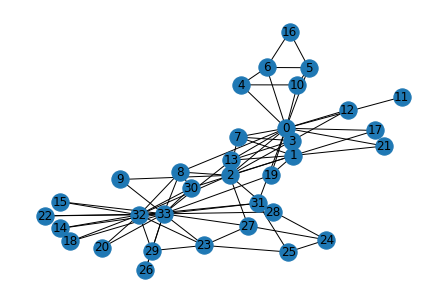

In [3]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network? (5 Points)

### **Explanation in Detail**
> To solve the problem, we should first check out what information is known. In this case, **number of edges** and **number of nodes** are given. And we also know that this graph is **undirected**. 
Hence, we conclude that one edge will contribute degree of **two**, *i.e.*, one for node u and the other for node v where u and v is connected by this edge.

In [4]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  total_degree = num_edges * 2   # Sum of degrees of all nodes over the graph
  avg_degree = total_degree / num_nodes
  avg_degree = round(avg_degree, 0)
  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5.0


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

### **Explanation in Detail**
> To solve the problem, let's recap the definition of **clustering coefficient**. It measures how connected node v's neighboring nodes are. In other words, it measures the ratio of number of existing edges to number of all potential edges among node v's neighbors. And we can write down the formula as follows:
$$e_{v} = \frac{\#Edges\ among\ neighbors}{\binom{k_v}{2}},\ where\ k_{v}\ is\ degree\ of\ node\ v.$$

> Instead of implementing the function from scratch, the problem requires us to call the appropriate function provided by `NetworkX`. Hence we can directly call function [average_clustering](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.clustering_coefficient.average_clustering.html#networkx.algorithms.approximation.clustering_coefficient.average_clustering) to do the estimation.

In [5]:
from networkx.algorithms.approximation.clustering_coefficient import average_clustering

def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function
  avg_cluster_coef = average_clustering(G=G, trials=1000, seed=2021)   # Set seed to enable reproducibility
  avg_cluster_coef = round(avg_cluster_coef, 2)
  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

### **Explanation in Detail**
> `PageRank` is a **link analysis approach** to estimate the importance of nodes in the graph. The notion behind the scene is that  **in-links** can be seen as votes. And, in-links from important pages should count more. In this problem, we are asked to implement `PageRank` by *Google*'s solution. The concept is that at each step, random surfer has a probability of $\beta$ to follow a link at random and $1 - \beta$ to jump (teleport) to some random page. And we can write down the formula as follows: $$r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$$

> Instead of estimating `PageRank` value for one node at a time, I use the concept of **stochastic adjacency matrix M** to compute all values at once. Then, a lookup of the given node is done to obtain the specified `PageRank` value. This method can be extended to the scenario where we want to get a more accurate approximation of `RageRank` values of all nodes. For more detailed information, please refer to [CS224W: Machine Learning with Graphs | 2021 | Lecture 4.1 - PageRank](https://www.youtube.com/watch?v=TU0ankRcHmo&list=PLoROMvodv4rPLKxIpqhjhPgdQy7imNkDn&index=10)


In [6]:
import numpy as np 
from networkx.linalg.graphmatrix import adjacency_matrix as adj

def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.
  # Please round r1 to 2 decimal places.

  r1 = 0

  ############# Your code here ############
  ## Note: 
  ## 1: You should not use nx.pagerank
  r0_vec = [r0 for _ in range(G.number_of_nodes())]   # Initialize rank vector
  
  # Compute stochastic adjacency matrix M
  adj_matrix = adj(G).toarray()
  out_links = [G.degree[v] for v in G.nodes]   # Number of out-links of each node 
  col_stoch_matix = np.divide(adj_matrix, out_links)
  
  # Estimate PageRank values
  pr_link = np.matmul(col_stoch_matix, r0_vec)[node_id]
  pr_teleport = r0
  r1 = beta * pr_link + (1-beta) * pr_teleport
  r1 = round(r1, 2)
  #########################################

  return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.13


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

### **Explanation in Detail**
> `Closeness centrality` uses the sum of shortest path lengths to all other nodes to measure the importance of a node. The larger the value (*i.e.*, small sum of lengths) is, the more important that node is. Hence, we can understand why we need to take the reciprocal in the formula, which can be written down as follows: $$c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$$

> Instead of using the function [closeness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html?highlight=closeness_centrality#networkx.algorithms.centrality.closeness_centrality), I first calculate the sum of shortest path lengths using function [shortest_path_length](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#networkx.algorithms.shortest_paths.generic.shortest_path_length), then take the reciprocal. Notice that the difference between the raw centrality implemented below and the normalized one (see [closeness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html?highlight=closeness_centrality#networkx.algorithms.centrality.closeness_centrality)) is a factor $(n-1)$, which is included in the formula as follows: $$c(v)_{normalized} = \frac{n-1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v},\ where\ n\ is\ the\ number\ of\ nodes\ that\ can\ reach\ node\ v.$$

In [7]:
from networkx.algorithms.shortest_paths.generic import shortest_path_length

def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality 
  # for a node in karate club network. G is the input karate club 
  # network and node is the node id in the graph. Please round the 
  # closeness centrality result to 2 decimal places.

  closeness = 0

  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized 
  ## closeness directly, which is different from the raw (unnormalized) 
  ## one that we learned in the lecture.
  total_len = 0
  shortest_path_lengths = shortest_path_length(G, source=node)
  for n, l in shortest_path_lengths.items():
      total_len += l
  closeness = 1 / total_len 
  closeness = round(closeness, 2)
  #########################################

  return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

The node 5 has closeness centrality 0.01


# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [8]:
import torch
print(torch.__version__)

1.9.0+cu111


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [9]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.7853, 0.3507, 0.8405, 0.2013],
        [0.1071, 0.3467, 0.4934, 0.0626],
        [0.9275, 0.8237, 0.2666, 0.2946]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`. Furthermore, each `dtype` has its own CPU and GPU variants. For more detailed information, please refer to [torch.Tensor](https://pytorch.org/docs/stable/tensors.html).

In [10]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 5: Get the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)

### **Explanation in Detail**
> To solve this problem, we only need to know some basic operations provided by `NetworkX` and `PyTorch`. In function `graph_to_edge_list`, edges of graph $G$ are extracted out using $G$'s property, edges. In the second function `edge_list_to_tensor`, we should remember to **transpose** the tensor to meet the requirement of the problem. I use function `transpose` here, and there's another method to transpose a tensor, called `permute`. For more detailed information, please refer to [torch.transpose](https://pytorch.org/docs/stable/generated/torch.transpose.html) and [torch.permute](https://pytorch.org/docs/stable/generated/torch.Tensor.permute.html?highlight=torch%20permute).

In [11]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.

  edge_list = []

  ############# Your code here ############
  for edge in G.edges(data=False):
      edge_list.append(edge)
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############
  edge_index = torch.tensor(edge_list, dtype=torch.long)
  edge_index = torch.transpose(edge_index, 0, 1)
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Question 6: Please implement following function that samples negative edges. Then answer which edges (edge_1 to edge_5) can be potential negative edges in the karate club network? (10 Points)

### **Explanation in Detail**
> To solve this problem, we need to clarify what negative edges mean. **Negative edges** are edges that don't exist in graph $G$. Following are the explanations of two parts: <br>
1. Because graph $G$ is **undirected**, I generate all negative edges $(i, j)'s\ with\ i < j$, which avoids the existence of duplicated edges in sampled negative edge list. Then, a random sampling is done with the specified number of negative edges. <br>
We can also solve the problem from the perspective of adjacency matrix, which is **symmetric** in this case. Negative edges are those $(row, col)$ pairs with zero values residing in the **upper triangular adjacency matrix without diagonal (self loops)**. Then, negative edges can be randomly sampled from these positions.
2. Again, we know that graph $G$ is **undirected**, so I write a function `check_neg` to determine whether the specified edge is in graph or not by representing edges as **node pairs (sets)**. And the determination is done by iteratively comparing all the existing edges in the graph with the specified edge (*i.e.*, second argument of function `check_neg`).

In [12]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. In this implementation, self loops should 
  # not be considered as either a positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph, if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one?

  neg_edge_list = []

  ############# Your code here ############
  n_nodes = G.number_of_nodes()
  neg_edges = []
  for i in range(n_nodes):
    for j in range(i+1, n_nodes):
      if j not in G.neighbors(i):
        neg_edges.append((i, j))
  neg_edge_list = random.sample(neg_edges, num_neg_samples)
  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
def check_neg(G, edge):
    '''Check if the edge is negative edge or not.
    
    Parameters:
        edge: tuple, the specified node pair
    
    Return:
        neg: boolean, if the specified node pair is negative edge or not
    '''
    neg = True
    for p_edge in G.edges(data=False):
        if set(p_edge) == set(edge):
            neg = False
    return neg
    
for i, edge in enumerate([edge_1, edge_2, edge_3, edge_4, edge_5]):
    ind = 'is' if check_neg(G, edge) else 'isn\'t'
    print(f"edge_{i+1} {ind} negative!")
#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])
edge_1 isn't negative!
edge_2 is negative!
edge_3 isn't negative!
edge_4 isn't negative!
edge_5 is negative!


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.9.0+cu111


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. An embedding layer can be seen as a **trainable** version of **lookup table** (*i.e.*, embedding matrix) storing embedding vectors of the corresponding items (*e.g.*, nodes in a  graph). Let's see how to use `nn.Embedding`:

In [18]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


We can select items from the embedding matrix, by using Tensor indices

In [19]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 0.3176, -1.0541, -0.3292,  1.5619,  0.3604, -0.3348,  0.4754, -0.5614]],
       grad_fn=<EmbeddingBackward>)
tensor([[ 0.3176, -1.0541, -0.3292,  1.5619,  0.3604, -0.3348,  0.4754, -0.5614],
        [-1.4761, -0.5862,  1.3527,  0.2054, -0.3388, -0.5045, -0.4699, -0.7523]],
       grad_fn=<EmbeddingBackward>)
torch.Size([4, 8])
tensor([[-1.6586, -0.6491, -0.6770,  0.5875,  1.5732, -1.2892,  0.8566,  0.8722],
        [ 0.3176, -1.0541, -0.3292,  1.5619,  0.3604, -0.3348,  0.4754, -0.5614],
        [-0.6856,  1.1770, -0.7875,  0.9414, -1.2594,  1.1471,  0.9733, -1.4087],
        [-1.4761, -0.5862,  1.3527,  0.2054, -0.3388, -0.5045, -0.4699, -0.7523]])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

### **Explanation in Detail** 
> To generate an embedding layer with initial weights under **uniform distribution**, we first initialize an embedding layer with the specified number of items (*i.e.*, nodes) and dimension of each embedding vector under. However, this weight matrix is initialized from $N(0, 1)$, so we need to reassign weights sampled from **uniform distribution** using `torch.rand` to the embedding layer.

In [67]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of returned 
  # layer should be initialized under uniform distribution. 

  emb = None

  ############# Your code here ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  weights_uniform = torch.rand(num_node, embedding_dim)
  emb.weight.data = weights_uniform
  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then we visualize each point, colored by the community it belongs to.

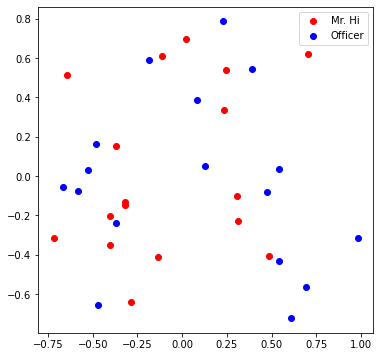

In [68]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

## Question 7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope. (20 Points)

We want to optimize our embeddings for the task of **classifying edges as positive or negative**. Given an edge and the embeddings for each node, the dot product of the embeddings, followed by a sigmoid, should give us the likelihood of that edge being either positive (output of sigmoid > 0.5) or negative (output of sigmoid < 0.5).

Note that we're using the functions you wrote in the previous questions, _as well as the variables initialized in previous cells_. If you're running into issues, make sure your answers to questions 1-6 are correct.

### **Explanation in Detail**
> To predict whether an edge exists or not, **dot product** is used as **similarity measure** to estimate the similarity between two nodes of an edge. Then, activation function, `sigmoid`, is applied to project the output values to range $(0, 1)$. Finally, loss and accuracy are computed by criterion `BCELoss` and evaluation metrics `accuracy`, respectively. <br> To implement evaluation metrics `accuracy`, I first map predicting values to either 0 or 1 using `torch.where` with the condition determining whether the value is greater than 0.5 or not. Then, I perform sample-wise **XNOR** and sum them up to obtain the total number of **true positive's** and **true negative's**. Finally, we get accuracy which can be written down as follows: $$\frac{\#True\ positive's\ +\ \#True\ negative's}{\#Training\ edges\ (samples)}$$

In [69]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############
  n_train_edges = len(label)
  pred = torch.where(pred > 0.5, 1, 0)
  with torch.no_grad():
    tp_tn = torch.sum(torch.logical_not(torch.logical_xor(pred, label)))
  accu = round((tp_tn / n_train_edges).item(), 4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and 
  # learning rate. In general, you need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (6) Update the embeddings using the loss and optimizer 
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############
    optimizer.zero_grad()

    # (1) Get node embeddings of all train_edges
    embs_src = emb(train_edge[0, :])
    embs_dst = emb(train_edge[1, :])

    # (2) Compute similarity using dot product
    # Perform Hadamard product then sum
    embs_sim = torch.sum(embs_src * embs_dst, dim=1)

    # (3) Apply activation function, sigmoid
    pred = sigmoid(embs_sim)

    # (4) Compute loss and do gradient descent
    loss = loss_fn(pred, train_label)
    loss.backward()
    optimizer.step()

    acc = accuracy(pred, train_label)
    print(f"Epoch{i} | Loss {loss} | Accuracy {acc}")
    #########################################

loss_fn = nn.BCELoss()   # Loss criterion
sigmoid = nn.Sigmoid()   # Output activatin 

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )
print(f"#Samples {len(pos_label)+len(neg_label)} | #Positive edges {len(pos_label)} | # Negative edges {len(neg_label)}")

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

train(emb, loss_fn, sigmoid, train_label, train_edge)

torch.Size([2, 78])
#Samples 156 | #Positive edges 78 | # Negative edges 78
torch.Size([2, 156])
Epoch0 | Loss 1.9490337371826172 | Accuracy 0.5
Epoch1 | Loss 1.9358919858932495 | Accuracy 0.5
Epoch2 | Loss 1.9111214876174927 | Accuracy 0.5
Epoch3 | Loss 1.8762487173080444 | Accuracy 0.5
Epoch4 | Loss 1.8327783346176147 | Accuracy 0.5
Epoch5 | Loss 1.7821706533432007 | Accuracy 0.5
Epoch6 | Loss 1.7258175611495972 | Accuracy 0.5
Epoch7 | Loss 1.6650363206863403 | Accuracy 0.5
Epoch8 | Loss 1.601055383682251 | Accuracy 0.5
Epoch9 | Loss 1.5350077152252197 | Accuracy 0.5
Epoch10 | Loss 1.4679254293441772 | Accuracy 0.5
Epoch11 | Loss 1.400735855102539 | Accuracy 0.5
Epoch12 | Loss 1.3342571258544922 | Accuracy 0.5
Epoch13 | Loss 1.2691980600357056 | Accuracy 0.5
Epoch14 | Loss 1.2061551809310913 | Accuracy 0.5
Epoch15 | Loss 1.1456152200698853 | Accuracy 0.5
Epoch16 | Loss 1.0879567861557007 | Accuracy 0.5
Epoch17 | Loss 1.0334560871124268 | Accuracy 0.5
Epoch18 | Loss 0.9822938442230225

## Visualize the final node embeddings
Visualize your final embedding here! 
You can visually compare the figure with the previous embedding figure. 
After training, you should oberserve that the two classes are more evidently separated. 
This is a great sanitity check for your implementation as well.

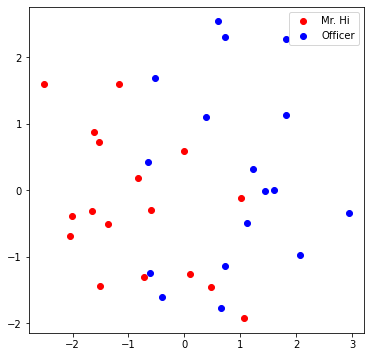

In [70]:
# Visualize the final learned embedding
visualize_emb(emb)

# Submission

In order to get credit, you must go submit your answers on Gradescope.